# PROYECTO MACHINE LEARNING

## Presentación negocio

Habrá que responder a las preguntas:
- ¿Qué problema o necesidad vamos a resolver?
- ¿Qué solución aporta tu modelo de ML?
- ¿Qué resultados nos ofrece el modelo? 
- ¿Qué decisiones o acciones te permiten llevar a cabo tu modelo? 
- ¿Qué consecuencias tiene en negocio?


## Presentación DS

Habrá que responder a las preguntas:
- ¿Qué problema o necesidad vamos a resolver?
- ¿Qué datos se han utilizado para el entrenamiento?
- ¿Qué transformaciones y consideraciones se han realizado?
- ¿Qué modelos has entrenado? 
- ¿Cómo ha sido el proceso de entrenamiento? 
- ¿Qué resultados nos ofrecen? ¿Qué modelo tiene mejores resultados?
- ¿Qué variables tienen de mayor impacto? 
- ¿Qué conclusiones has obtenido? 



## Pasos del proyecto
1. ¿Podemos dar solución a un problema con datos? Elige un tema.
1. Busca y consigue los datos. Vuelta al anterior punto si nos quedamos sin ideas.
1. Define tu problema de Machine Learning: clasificación/regresión, supervisado/ no supervisado, series temporales, imágenes, texto...
1. Exploratorio: obtén todos los estadísticos y gráficos que necesites para entender bien tu dataset.
1. Limpia los datos: duplicados, missings, outliers, columnas inútiles...
1. Feature engineering: transformación y creación de nuevas variables.
1. Prueba varios modelos. Itero tanto en nuevos conjuntos de datos, corrijo overfitting,
1. Analiza los resultados mediante una métrica adecuada a tu problemática.
1. Interpreta los resultados y comprende los outputs del modelo.
1. Siguientes pasos. ¿Se podría seguir enriqueciendo el modelo con otras pruebas o con otros datos?

#### TEMA A TRATAR 1
Predicción del precio en base a una estrategia 

#### TEMA A TRATAR 2
Análisis de correlaciones entre acciones, las relaciones y correlaciones entre diferentes acciones y desarrolla modelos de machine learning para predecir cómo los movimientos de una acción pueden influir en otras acciones o en el mercado en su conjunto.

#### 
Se trataría de realizar una estrategia sencilla donde se compre y se venda de forma utomatizada y nosotros predecir a través de machine learning los precios futuros 

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cycler

In [2]:
# Para que nos ignore los warnings
warnings.filterwarnings("ignore") 

In [ ]:

'''
Acciones:

Apple Inc. - AAPL
Microsoft Corporation - MSFT
Amazon.com Inc. - AMZN
Alphabet Inc. - GOOGL
Facebook Inc. - FB
Tesla Inc. - TSLA


Índices:

S&P 500 - ^GSPC
Dow Jones Industrial Average - ^DJI
Nasdaq Composite - ^IXIC

'''

In [3]:
# Importamos datos de YAHOO FINANCE
yf.download("^IXIC")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0
...,...,...,...,...,...,...
2023-06-09,13312.389648,13385.950195,13229.330078,13259.139648,13259.139648,4412710000
2023-06-12,13326.370117,13465.910156,13302.580078,13461.919922,13461.919922,4722680000
2023-06-13,13566.530273,13594.400391,13473.190430,13573.320312,13573.320312,5522100000


In [4]:
# Hacemos una nueva función para las llamadas que hagamos a YAHOO FINANZAS y hacer un preprocesado de los datos
def preprocessing_yf(symbol):

# Importamos los datos
    df = yf.download(symbol).dropna()

# Renombramos columnas y el índice
    df.columns = ["open", "high", "low", "close", "adj close", "volume"]
    df.index.name ="time"

# Eliminamos la columna de adj close
    del df["adj close"]
    del df["volume"]


    return df

In [5]:
df = preprocessing_yf("^IXIC")
df.tail()

[*********************100%***********************]  1 of 1 completed


,open,high,low,close
time,,,,
2023-06-09,13312.389648,13385.950195,13229.330078,13259.139648
2023-06-12,13326.370117,13465.910156,13302.580078,13461.919922
2023-06-13,13566.530273,13594.400391,13473.190430,13573.320312
2023-06-14,13570.559570,13661.740234,13455.990234,13626.480469
2023-06-15,13572.879883,13828.169922,13561.370117,13782.820312


In [6]:
# Para los gráficos con colores
colors = cycler("color", ["#669FEE", "#66EE91", "#9988DD", "#EECC55", "88BB44", "#FFBBBB"])

plt.rc("figure", facecolor = "#313233")
plt.rc("axes", facecolor= "#313233", edgecolor= "none", axisbelow = True, grid=True, prop_cycle = colors, labelcolor = "gray") # edgecolor se establece en "none" para eliminar los bordes de los ejes, axisbelow se establece en True para que las líneas de la cuadrícula se dibujen debajo de las barras, grid se establece en True para mostrar la cuadrícula
plt.rc("grid", color="474A4A", linestyle="solid") # el estilo se establece en "solid" para líneas continuas
plt.rc("xtick", color="gray") # "out" para que apunten hacia afuera del gráfico
plt.rc("ytick", direction="out", color= "gray")
plt.rc("legend", facecolor= "#313233", edgecolor= "#313233")
plt.rc("text", color= "#C9C9C9")

In [7]:
# Creamos una media móvil simple de 30 días
df["SMA fast"] = df["close"].rolling(30).mean()

# Creamos una media móvil simple de 60 días
df["SMA slow"] = df["close"].rolling(60).mean()

In [8]:
df.head()

,open,high,low,close,SMA fast,SMA slow
time,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,NaN,NaN
1971-02-08,100.839996,100.839996,100.839996,100.839996,NaN,NaN
1971-02-09,100.760002,100.760002,100.760002,100.760002,NaN,NaN
1971-02-10,100.690002,100.690002,100.690002,100.690002,NaN,NaN
1971-02-11,101.449997,101.449997,101.449997,101.449997,NaN,NaN


In [9]:
df.tail()

,open,high,low,close,SMA fast,SMA slow
time,,,,,,
2023-06-09,13312.389648,13385.950195,13229.330078,13259.139648,12616.680339,12291.349349
2023-06-12,13326.370117,13465.910156,13302.580078,13461.919922,12657.858333,12320.426676
2023-06-13,13566.530273,13594.400391,13473.190430,13573.320312,12703.215690,12352.806852
2023-06-14,13570.559570,13661.740234,13455.990234,13626.480469,12754.748047,12385.322526
2023-06-15,13572.879883,13828.169922,13561.370117,13782.820312,12813.331055,12417.367692


<Axes: xlabel='time'>

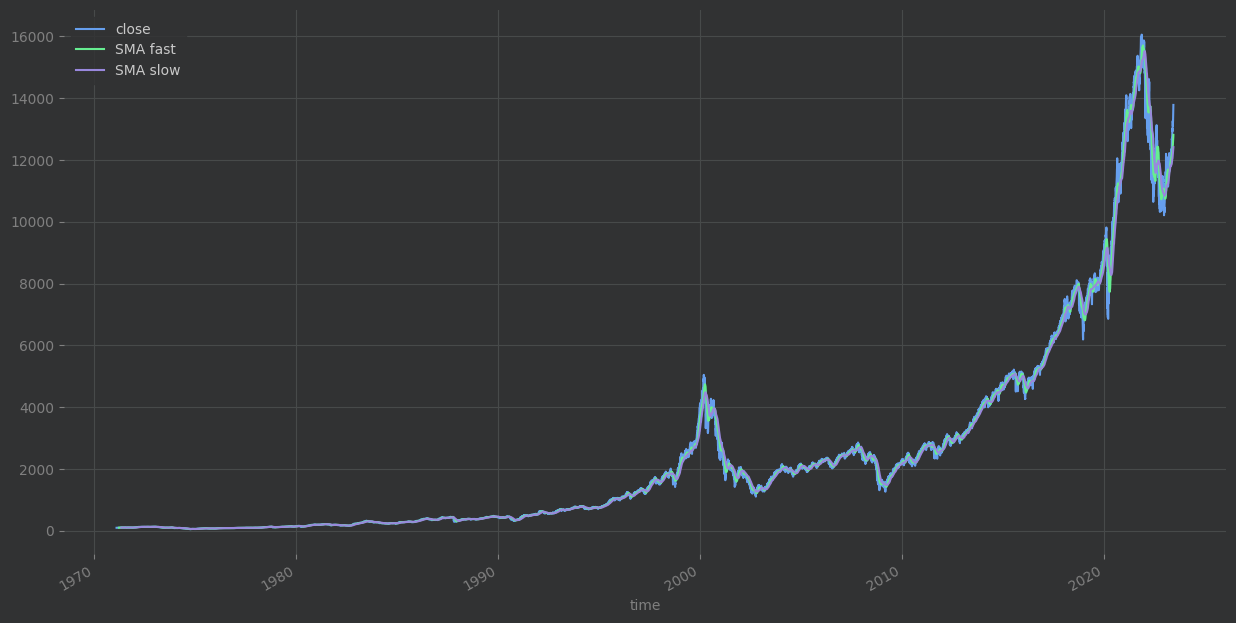

In [10]:
# Plot the results
df[["close", "SMA fast", "SMA slow"]].plot(figsize=(15,8))

<Axes: xlabel='time'>

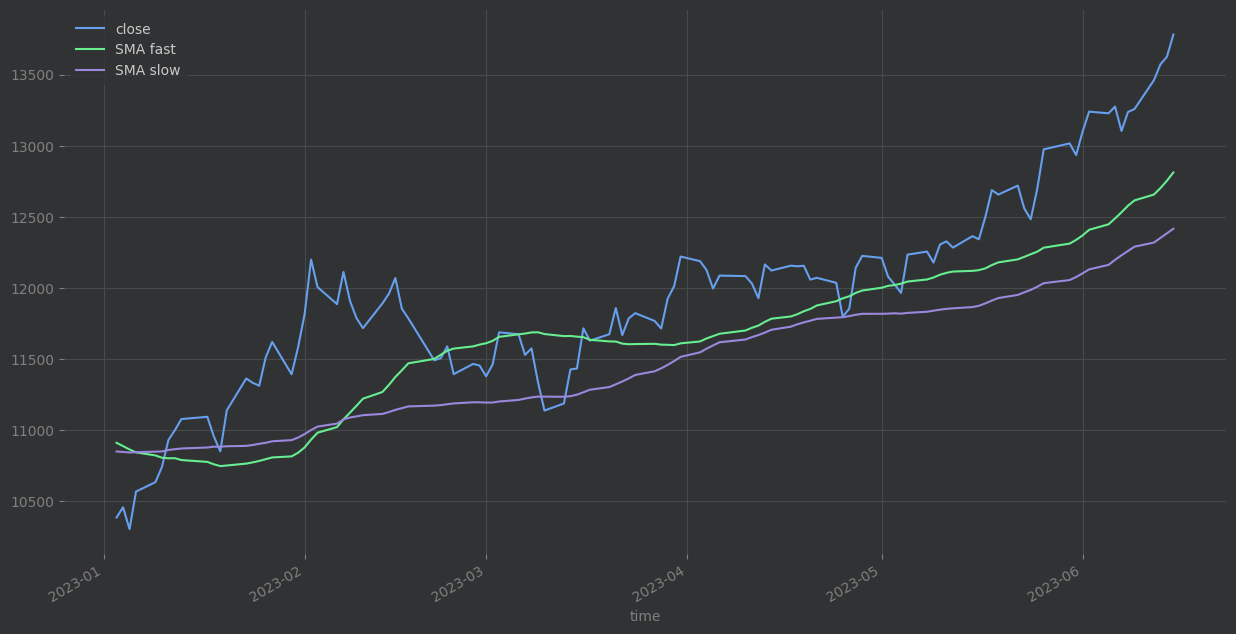

In [11]:
# Plot the results del año 2023
df[["close", "SMA fast", "SMA slow"]].loc["2023"].plot(figsize=(15,8))

#### ESTARTEGIA 

COMPRA --> La MA 30 cruza a la MA 60 hacia arriba

VENTA --> La MA 30 cruza a la MA 60 hacia abajO

MODIFICARLA--> Solo es rentable cuando sigue la tendencia fuertemente

In [12]:
# definimos una nueva columna
df["position"] = np.nan # esta estará llena de valores nan

In [13]:
# Creamos la condición
# con loc localizamos las columnas
df.loc[(df["SMA fast"] > df["SMA slow"]), "position"] = 1 # pasará a un valor de compras
df.loc[(df["SMA fast"] < df["SMA slow"]), "position"] = -1 # pasará a un valor de ventas

#### VERIFICAR LA POSICIÓN DE TRADING CALCULADA


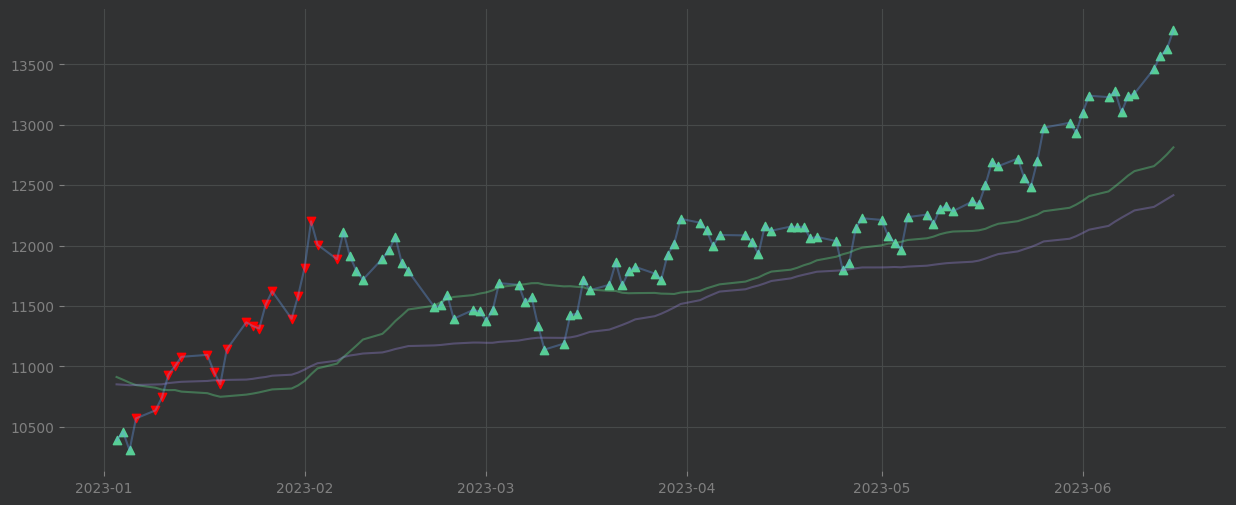

In [14]:
# Representamos toda la señal para asegurarnos de que es la correcta

year= "2023"

# Seleccionamos toda la señal en una lista de índices para representa sólo esos puntos
idx_open = df.loc[df["position"] == 1].loc[year].index # indice de una compra donde la posición sea positiva, es decir, 1
idx_close = df.loc[df["position"] == -1].loc[year].index # indice de una venta donde la posición sea negativa, es decir, -1

# Adaptamos el tamaño del gráfico
plt.figure(figsize=(15,6))

#Representamos los puntos de la señal larga "open" en verde y con flecha hacia arriba y la señal "sell" en rojo y con flecha hacia abajo
plt.scatter(idx_open, df.loc[idx_open]["close"].loc[year], color= "#57CE95", marker="^") 
plt.scatter(idx_close, df.loc[idx_close]["close"].loc[year], color= "red", marker="v")


# Representamos la resistencia para asegurarnos de que las condiciones se completan y las difuminamos un poco con alpha
plt.plot(df["close"].loc[year].index,df["close"].loc[year], alpha=0.35)

plt.plot(df["close"].loc[year].index,df["SMA fast"].loc[year], alpha=0.35)

plt.plot(df["close"].loc[year].index,df["SMA slow"].loc[year], alpha=0.35)


# Mostramos el gráfico
plt.show()


In [ ]:
# Estacionalidad 
# Clasificación y Regresión
# Mejor aumentar los falsos negativos que los falsos positivos para así reducir las operaciones negativas donde se pierda dinero

In [ ]:
# Las RNN son especialmente adecuadas para trabajar con datos secuenciales, como series temporales o texto, ya que pueden recordar y utilizar información anterior para influir en las salidas futuras.

In [ ]:
# Una vez entrenada, la red puede usarse para hacer predicciones o clasificar nuevos datos.

# FEATURE ENGINEER

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf

In [3]:
# Importar los datos
df = yf.download("GOOG")
df.columns

[*********************100%***********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
# Renombrar las columnas
df = df[["Adj Close"]] # el cierre ajustado
df.columns = ["close"]
df

,close
Date,
2004-08-19,2.499133
2004-08-20,2.697639
2004-08-23,2.724787
2004-08-24,2.611960
2004-08-25,2.640104
...,...
2023-06-15,125.790001
2023-06-16,124.059998
2023-06-20,123.849998


# Media móvil simple (SMA)

In [7]:
# Media móvil simple (Simple Moving Average)
df["SMA 15"] = df[["close"]].rolling(15).mean().shift(1) # 15 días SMA rápida
df["SMA 60"] = df[["close"]].rolling(60).mean().shift(1) # 60 días SMA lenta

In [8]:
df

,close,SMA 15,SMA 60
Date,,,
2004-08-19,2.499133,NaN,NaN
2004-08-20,2.697639,NaN,NaN
2004-08-23,2.724787,NaN,NaN
2004-08-24,2.611960,NaN,NaN
2004-08-25,2.640104,NaN,NaN
...,...,...,...
2023-06-15,125.790001,124.347334,112.813750
2023-06-16,124.059998,124.624001,113.146250
2023-06-20,123.849998,124.604667,113.476917


<Axes: xlabel='Date'>

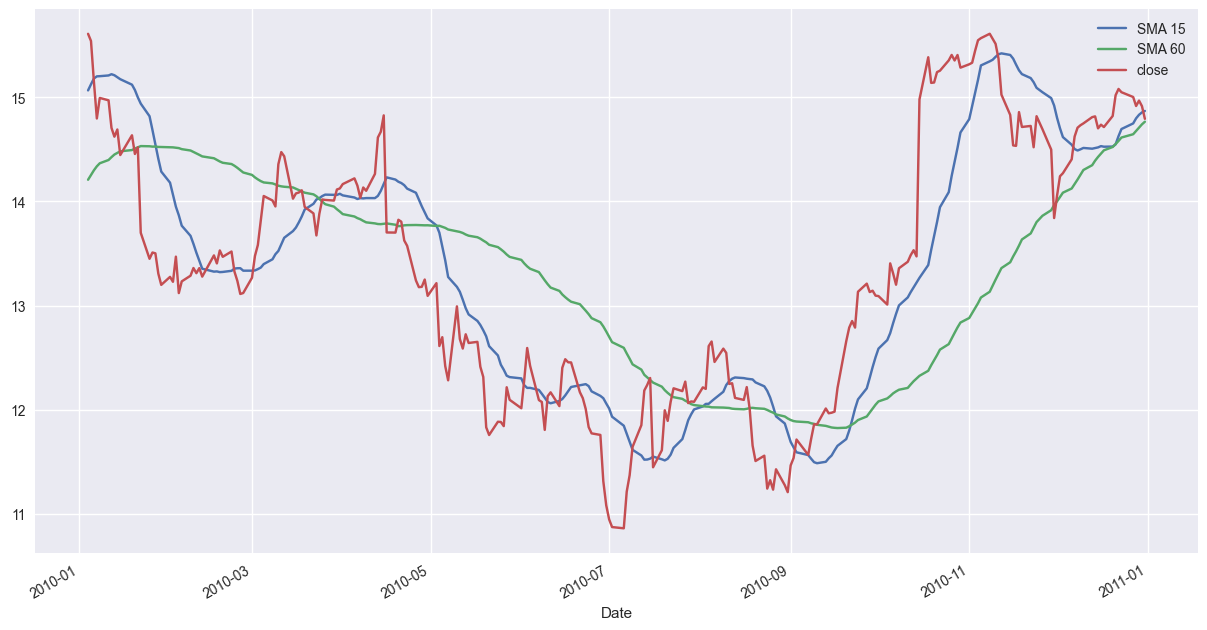

In [9]:
# Usamos ese orden para que nos salga así en la leyenda
# Ajustamos la franja temporal
# Ajustamos el gráfico del tamaño
df[["SMA 15", "SMA 60", "close"]].loc["2010"].plot(figsize=(15,8))

# Desviación estándar móvil (MSD)

In [10]:
# Volatilidad del Retorno (Moving Standar Desviation) --> calculamos la volatilidad de un día respecto al siguiente
df["returns"] = df["close"].pct_change(1) # para calcular el incremento porcentual del activo con respecto a un día de diferencia

df["MSD 15"] = df[["returns"]].rolling(15).std().shift(1) # Usamos shift(1) por lo mismo que en la SMA
df["MSD 60"] = df[["returns"]].rolling(60).std().shift(1)

In [11]:
df

,close,SMA 15,SMA 60,returns,MSD 15,MSD 60
Date,,,,,,
2004-08-19,2.499133,NaN,NaN,NaN,NaN,NaN
2004-08-20,2.697639,NaN,NaN,0.079430,NaN,NaN
2004-08-23,2.724787,NaN,NaN,0.010064,NaN,NaN
2004-08-24,2.611960,NaN,NaN,-0.041408,NaN,NaN
2004-08-25,2.640104,NaN,NaN,0.010775,NaN,NaN
...,...,...,...,...,...,...
2023-06-15,125.790001,124.347334,112.813750,0.011336,0.014370,0.017539
2023-06-16,124.059998,124.624001,113.146250,-0.013753,0.014055,0.016966
2023-06-20,123.849998,124.604667,113.476917,-0.001693,0.013470,0.016939


<Axes: xlabel='Date'>

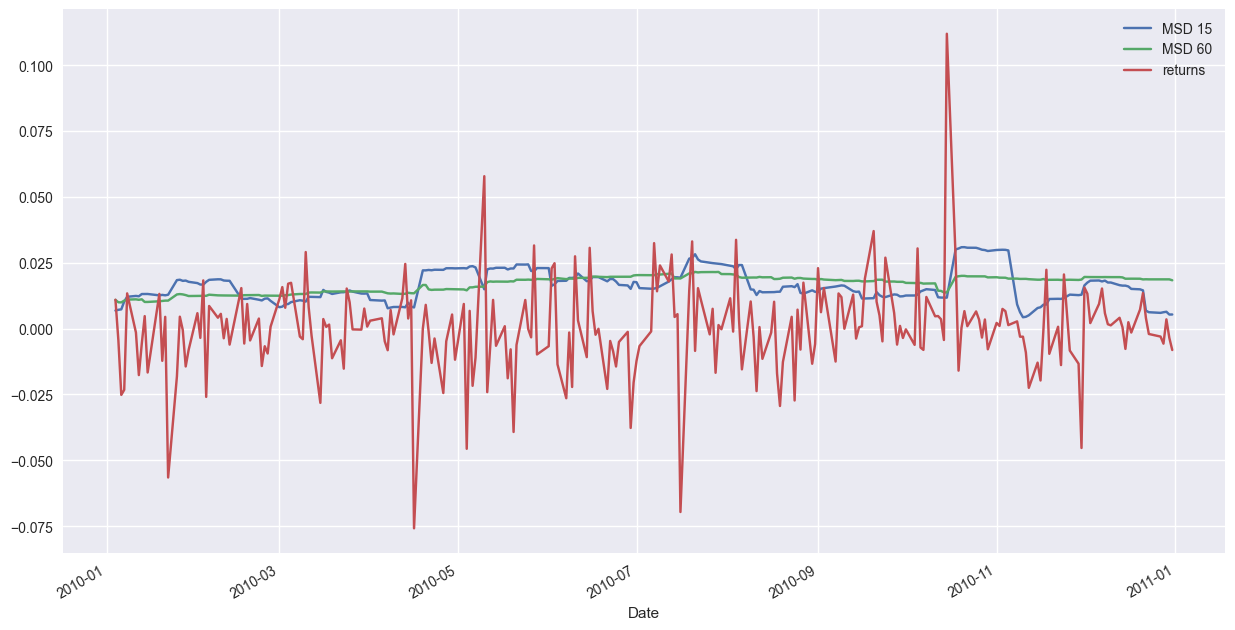

In [12]:
# Usamos ese orden para que nos salga así en la leyenda

df[["MSD 15", "MSD 60", "returns"]].loc["2010"].plot(figsize=(15,8))

# Los picos a la alza nos impactan en ambas MSD
    # Nos provocan variaciones en la desviación estándar móvil

# índice de Fuerza Relativa (RSI) 
Librería Technical Analysis (ta)  https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html

In [13]:
# Importar la librería ta (tecnical analisis) 
# índice de Fuerza Relativa
import ta
RSI = ta.momentum.RSIIndicator(df["close"], window=14, fillna=False) # El valor por defecto es 14 y usamos fillna(False) para que no lo rellene
RSI

In [14]:
df["rsi"] = RSI.rsi()

In [16]:
df

,close,SMA 15,SMA 60,returns,MSD 15,MSD 60,rsi
Date,,,,,,,
2004-08-19,2.499133,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,2.697639,NaN,NaN,0.079430,NaN,NaN,NaN
2004-08-23,2.724787,NaN,NaN,0.010064,NaN,NaN,NaN
2004-08-24,2.611960,NaN,NaN,-0.041408,NaN,NaN,NaN
2004-08-25,2.640104,NaN,NaN,0.010775,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-06-15,125.790001,124.347334,112.813750,0.011336,0.014370,0.017539,63.148909
2023-06-16,124.059998,124.624001,113.146250,-0.013753,0.014055,0.016966,57.490651
2023-06-20,123.849998,124.604667,113.476917,-0.001693,0.013470,0.016939,56.825053


<Axes: xlabel='Date'>

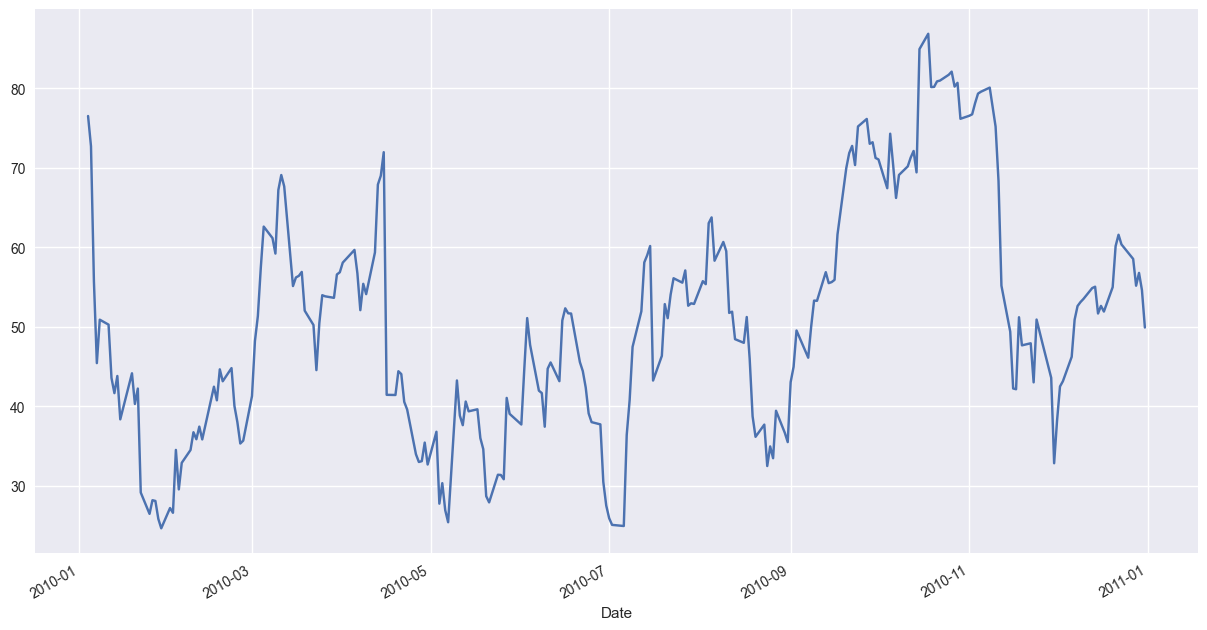

In [15]:
df["rsi"].loc["2010"].plot(figsize=(15,8))

# Si baja de 30 a comprar
# Si sube de 70 a vender